Installing packages

In [ ]:

try:
    import time
    import numpy as np
    import jax  
    import jax.numpy as jnp
    import jaxlib
    import diffrax
    import equinox
    import optax
    import matplotlib
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
except:
    import sys
    import subprocess

    packages = ["jax", "jaxlib", "diffrax", "equinox", "optax", "matplotlib", "scikit-learn"]

    for pkg in packages:
        cmd = [sys.executable, "-m", "pip", "install", pkg]
        print("Installiere:", pkg)
        subprocess.run(cmd)
    print("Fertig.")


JAX Toutorial:

In [29]:
def diff(f):
    return jax.grad(f)

f = lambda x: x**3 + x**2
df = diff(f)
print(df(10.0))


320.0


In [30]:
a = jnp.array([1.0,2.0])
print(a * 2.0)

[2. 4.]


In [31]:
def f(x):
    return x**3 + x**2

df = jax.grad(f)        
print(df(10.0))  

320.0


**Project0**

In [32]:
data = load_iris()
X = data.data
Y = data.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def init_params(input_dim, hidden_dim1, hidden_dim2, output_dim, random_key):
    random_keys = jax.random.split(random_key, 3)

    W1 = jax.random.normal(random_keys[0], (input_dim, hidden_dim1))
    b1 = jnp.zeros((hidden_dim1,))
    W2 = jax.random.normal(random_keys[1], (hidden_dim1, hidden_dim2))
    b2 = jnp.zeros((hidden_dim2,))
    W3 = jax.random.normal(random_keys[2], (hidden_dim2, output_dim))
    b3 = jnp.zeros((output_dim,))
    
    return W1, b1, W2, b2, W3, b3

def forward(params, X):
    W1, b1, W2, b2, W3, b3 = params
    h1 = jax.nn.relu(jnp.dot(X, W1) + b1)
    h2 = jax.nn.relu(jnp.dot(h1, W2) + b2)
    logits = jnp.dot(h2, W3) + b3
    return logits

def loss_fn(params, x, y, l2_reg=0.0001):
    logits = forward(params, x)
    probs = jax.nn.softmax(logits)
    l2_loss = l2_reg * sum([jnp.sum(w ** 2) for w in params[::2]])
    return -jnp.mean(jnp.sum(y * jnp.log(probs + 1e-8), axis=1)) + l2_loss

@jax.jit
def train_step(params, x, y, lr):
    grads = jax.grad(loss_fn)(params, x, y)
    return [(param - lr * grad) for param, grad in zip(params, grads)]    

def accuracy(params, x, y):
    preds = jnp.argmax(forward(params, x), axis=1)
    targets = jnp.argmax(y, axis=1)
    return jnp.mean(preds == targets)

def data_loader(X, y, batch_size):
    for i in range(0, len(X), batch_size):
        yield X[i:i+batch_size], y[i:i+batch_size]
    
random_key = jax.random.key(int(time.time()))
input_dim = X_train.shape[1]
hidden_dim1 = 16
hidden_dim2 = 8
output_dim = y_train.shape[1]
learning_rate = 0.005
batch_size = 16
epochs = 200

params = init_params(input_dim, hidden_dim1, hidden_dim2, output_dim, random_key)

for epoch in range(epochs):
    for X_batch, y_batch, in data_loader(X_train, y_train, batch_size):
        params = train_step(params, X_batch, y_batch, learning_rate)
        
    if epoch % 10 == 0:
        train_acc = accuracy(params, X_train, y_train)
        test_acc = accuracy(params, X_test, y_test)
        print(f'Epoch {epoch} : Train Acc ({train_acc:.4f}), Test Acc ({test_acc:.4f})')
print(f'Final Test Acc: {accuracy(params, X_test, y_test)}')

Epoch 0 : Train Acc (0.7833), Test Acc (0.7333)
Epoch 10 : Train Acc (0.8750), Test Acc (0.7667)
Epoch 20 : Train Acc (0.8917), Test Acc (0.8333)
Epoch 30 : Train Acc (0.8833), Test Acc (0.8333)
Epoch 40 : Train Acc (0.8917), Test Acc (0.8333)
Epoch 50 : Train Acc (0.9000), Test Acc (0.8333)
Epoch 60 : Train Acc (0.9083), Test Acc (0.8333)
Epoch 70 : Train Acc (0.9167), Test Acc (0.8667)
Epoch 80 : Train Acc (0.9167), Test Acc (0.8667)
Epoch 90 : Train Acc (0.9167), Test Acc (0.8667)
Epoch 100 : Train Acc (0.9167), Test Acc (0.8667)
Epoch 110 : Train Acc (0.9167), Test Acc (0.8667)
Epoch 120 : Train Acc (0.9167), Test Acc (0.8667)
Epoch 130 : Train Acc (0.9167), Test Acc (0.8667)
Epoch 140 : Train Acc (0.9167), Test Acc (0.9000)
Epoch 150 : Train Acc (0.9167), Test Acc (0.9000)
Epoch 160 : Train Acc (0.9250), Test Acc (0.9333)
Epoch 170 : Train Acc (0.9333), Test Acc (0.9333)
Epoch 180 : Train Acc (0.9333), Test Acc (0.9333)
Epoch 190 : Train Acc (0.9333), Test Acc (0.9333)
Final Test 

**Project 1: Sin curve**
hier als MLP

Epoch 050 Loss 0.009948
Epoch 100 Loss 0.001181
Epoch 150 Loss 0.000275
Epoch 200 Loss 0.000120
Epoch 250 Loss 0.000100
Epoch 300 Loss 0.000093
Epoch 350 Loss 0.000083
Epoch 400 Loss 0.000065


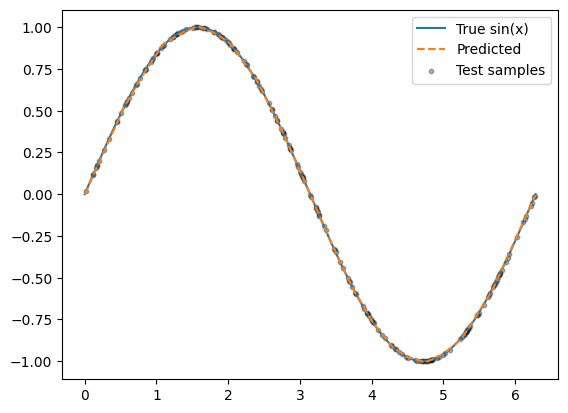

In [33]:
# Erzeugung von Sinusdaten, Modell, Training und Plot (für Jupyter)
import time
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Daten: Sinuskurve (ein-dim Input, ein-dim Output) ---
n_samples = 1000
rng = jax.random.PRNGKey(0)
xs = jnp.linspace(0, 2*jnp.pi, n_samples).reshape(-1, 1)   # <- statt reshape(0,1)
ys = jnp.sin(xs)                                                        # Ziel shape (N,1)

# Shuffle + Split (verwende numpy/sklearn helpers; konvertiere zu jnp arrays nach split)
import numpy as np
idx = np.random.RandomState(0).permutation(n_samples)
X_np = np.array(xs)[idx]
Y_np = np.array(ys)[idx]
X_train, X_test, y_train, y_test = train_test_split(X_np, Y_np, test_size=0.2, random_state=1)

# StandardScaler (auf Input) — optional, aber oft hilfreich
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konvertiere zurück zu JAX-Arrays (float32)
X_train = jnp.array(X_train, dtype=jnp.float32)
X_test  = jnp.array(X_test, dtype=jnp.float32)
y_train = jnp.array(y_train, dtype=jnp.float32)
y_test  = jnp.array(y_test, dtype=jnp.float32)

# --- Modell: MLP mit skalarer Ausgabe (output_dim = 1) ---
def init_params(input_dim, hidden_dim1, hidden_dim2, output_dim, random_key):
    k1, k2, k3 = jax.random.split(random_key, 3)
    W1 = jax.random.normal(k1, (input_dim, hidden_dim1)) * jnp.sqrt(2.0/(input_dim))    # He-Init
    b1 = jnp.zeros((hidden_dim1,))
    W2 = jax.random.normal(k2, (hidden_dim1, hidden_dim2)) * jnp.sqrt(2.0/(hidden_dim1))
    b2 = jnp.zeros((hidden_dim2,))
    W3 = jax.random.normal(k3, (hidden_dim2, output_dim)) * jnp.sqrt(2.0/(hidden_dim2))
    b3 = jnp.zeros((output_dim,))
    return (W1, b1, W2, b2, W3, b3)

def forward(params, X):
    W1, b1, W2, b2, W3, b3 = params
    h1 = jax.nn.relu(jnp.dot(X, W1) + b1)
    h2 = jax.nn.relu(jnp.dot(h1, W2) + b2)
    out = jnp.dot(h2, W3) + b3      # skalarer Regressionsoutput (shape (B,1))
    return out

# --- Loss: MSE (keine Softmax / CrossEntropy mehr) ---
def loss_fn(params, x, y, l2_reg=1e-6):
    preds = forward(params, x)
    mse = jnp.mean((preds - y) ** 2)
    W1, b1, W2, b2, W3, b3 = params
    l2 = l2_reg * (jnp.sum(W1**2) + jnp.sum(W2**2) + jnp.sum(W3**2))
    return mse + l2

# --- Optimizer (optax) + JITed train step ---
optimizer = optax.adam(1e-3)

@jax.jit
def update_step(params, opt_state, x, y):
    loss, grads = jax.value_and_grad(loss_fn)(params, x, y)
    updates, opt_state = optimizer.update(grads, opt_state, params)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss

# --- Training-Helper: mini-batches ---
def data_loader(X, y, batch_size, shuffle=True):
    n = X.shape[0]
    idx = np.arange(n)
    if shuffle:
        np.random.shuffle(idx)
    for i in range(0, n, batch_size):
        batch_idx = idx[i:i+batch_size]
        yield X[batch_idx], y[batch_idx]

# --- Hyperparameter + Init ---
input_dim = 1
hidden_dim1 = 16
hidden_dim2 = 16
output_dim = 1
batch_size = 32
epochs = 400

key = jax.random.PRNGKey(42)
params = init_params(input_dim, hidden_dim1, hidden_dim2, output_dim, key)
opt_state = optimizer.init(params)

# --- Training Loop ---
for epoch in range(1, epochs+1):
    epoch_losses = []
    for Xb, yb in data_loader(np.array(X_train), np.array(y_train), batch_size):
        # Konvertiere Batch nach jnp.array und float32
        Xb = jnp.array(Xb, dtype=jnp.float32)
        yb = jnp.array(yb, dtype=jnp.float32)
        params, opt_state, loss = update_step(params, opt_state, Xb, yb)
        epoch_losses.append(float(loss))
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} Loss {np.mean(epoch_losses):.6f}")

# grid in Originaldomain
grid = jnp.linspace(0, 2*jnp.pi, 400).reshape(-1,1)
grid_scaled = scaler.transform(np.array(grid)).astype(np.float32)
preds_grid = forward(params, jnp.array(grid_scaled))

# Testsamples in Originaldomain zum Plotten
X_test_orig = scaler.inverse_transform(np.array(X_test)).ravel()
y_test_flat  = np.array(y_test).ravel()

plt.plot(grid, jnp.sin(grid), label="True sin(x)")
plt.plot(grid, preds_grid, label="Predicted", linestyle='--')
plt.scatter(X_test_orig, y_test_flat, s=10, color='k', alpha=0.3, label="Test samples")
plt.legend()
plt.show()


Project 1: try as NODE, but some Bugs are left

Total samples: 1000, Training: 800, Test: 200
Epoch 020  loss=0.069206
Epoch 040  loss=0.064026
Epoch 060  loss=0.063925
Epoch 080  loss=0.062927
Epoch 100  loss=0.060551
Epoch 120  loss=0.059940
Epoch 140  loss=0.064620


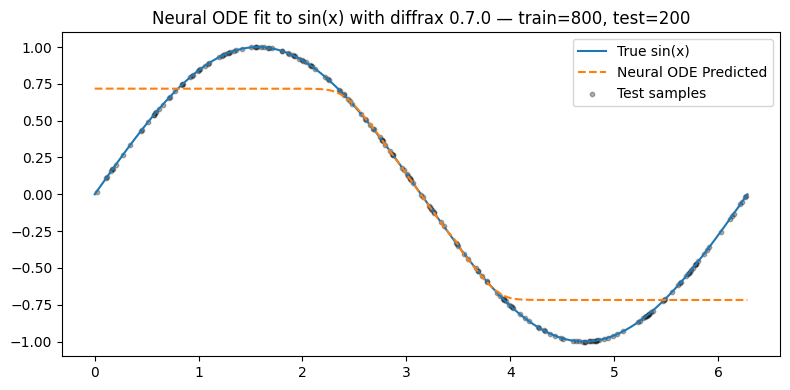

In [49]:
# neural_ode_sine_time_feature.py
import jax
import jax.numpy as jnp
import jax.nn as jnn
import jax.tree_util as jtu
import numpy as np
import equinox as eqx
import diffrax
import optax
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# -----------------------------
# Daten
# -----------------------------
n_samples = 1000
xs = jnp.linspace(0, 2 * jnp.pi, n_samples).reshape(-1, 1)
ys = jnp.sin(xs)

rng = np.random.RandomState(0)
perm = rng.permutation(n_samples)
X_np = np.array(xs)[perm]
Y_np = np.array(ys)[perm]
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, Y_np, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_np)
X_test_s = scaler.transform(X_test_np)

# Anzahl anzeigen
n_total = X_np.shape[0]
n_train = X_train_s.shape[0]
n_test = X_test_s.shape[0]
print(f"Total samples: {n_total}, Training: {n_train}, Test: {n_test}")

X_train = jnp.array(X_train_s, dtype=jnp.float32)
X_test  = jnp.array(X_test_s, dtype=jnp.float32)
y_train = jnp.array(y_train_np, dtype=jnp.float32)   # targets kept in original scale (or scale if desired)
y_test  = jnp.array(y_test_np, dtype=jnp.float32)

# -----------------------------
# Func (mit time-feature als zusätzlichem Input)
# -----------------------------
class Func(eqx.Module):
    out_scale: jax.Array
    mlp: eqx.nn.MLP

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        # data_size = dim of y (here 1). We add one time-feature -> in_size = data_size + 1
        self.out_scale = jnp.array(1.0)
        self.mlp = eqx.nn.MLP(
            in_size=data_size + 1,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.softplus,
            final_activation=jnn.tanh,
            key=key,
        )

    # args is intended to be the per-sample time-feature (shape (d,) or scalar)
    def __call__(self, t, y, args):
        time_feat = args
        # ensure time_feat has trailing dim
        if jnp.ndim(time_feat) == 0:
            time_feat = jnp.expand_dims(time_feat, -1)
        inp = jnp.concatenate([y, time_feat], axis=-1)
        return self.out_scale * self.mlp(inp)

# -----------------------------
# NeuralODE wrapper (nur für convenience; not used in training)
# -----------------------------
class NeuralODE(eqx.Module):
    func: Func

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.func = Func(data_size, width_size, depth, key=key)

    def __call__(self, ts, y0):
        solution = diffrax.diffeqsolve(
            diffrax.ODETerm(self.func),
            diffrax.Tsit5(),
            t0=ts[0],
            t1=ts[-1],
            dt0=ts[1] - ts[0],
            y0=y0,
            stepsize_controller=diffrax.PIDController(rtol=1e-3, atol=1e-6),
            saveat=diffrax.SaveAt(ts=ts),
        )
        return solution.ys

# -----------------------------
# Setup: Modell, Solver, Adjoint
# -----------------------------
key = jax.random.PRNGKey(0)
in_dim = 1
width = 32
depth = 3

model = NeuralODE(data_size=in_dim, width_size=width, depth=depth, key=key)
func_model = model.func

solver = diffrax.Tsit5()
adjoint = diffrax.BacksolveAdjoint()
t0, t1 = 0.0, 1.0
controller = diffrax.PIDController(rtol=1e-2, atol=1e-4)
saveat = diffrax.SaveAt(t1=True)

# -----------------------------
# solve_batch: übergibt x_batch als per-sample time-features via args
# -----------------------------
def solve_batch(func_model, x_batch):
    # x_batch: (B, d)  where d == 1
    B, d = x_batch.shape
    # choose y0 zeros so the time-feature is explicitly the input
    y0 = jnp.zeros((B * d,), dtype=x_batch.dtype)

    def rhs_flat(t, y_flat, args):
        # args packs (func_model, time_features)
        theta, time_feats = args
        y = y_flat.reshape((B, d))
        # single_rhs receives yi (shape (d,)) and ti (shape (d,) or scalar)
        def single_rhs(yi, ti):
            return theta(t, yi, ti)
        dy = jax.vmap(single_rhs)(y, time_feats)  # shape (B, d)
        return dy.ravel()

    term = diffrax.ODETerm(rhs_flat)
    args = (func_model, x_batch)
    sol = diffrax.diffeqsolve(
        term,
        solver,
        t0,
        t1,
        dt0=(t1 - t0) / 1.0,
        y0=y0,
        args=args,
        saveat=saveat,
        stepsize_controller=controller,
        adjoint=adjoint,
        max_steps=20000,
    )
    return sol.ys[0].reshape((B, d))

# -----------------------------
# Loss, Optimizer, Update
# -----------------------------
def loss_fn(model, x, y, l2_reg=1e-6):
    preds = solve_batch(model.func, x)     # (B,1) scaled inputs; preds are in same scale as y0 outputs
    mse = jnp.mean((preds - y) ** 2)
    params = eqx.filter(model, eqx.is_array)
    leaves = jtu.tree_leaves(params)
    l2 = l2_reg * sum(jnp.sum(p**2) for p in leaves)
    return mse + l2

optimizer = optax.adam(5e-3)
opt_state = optimizer.init(eqx.filter(model, eqx.is_array))

loss_and_grad = eqx.filter_value_and_grad(loss_fn)

@eqx.filter_jit
def update(model, opt_state, x, y):
    loss, grads = loss_and_grad(model, x, y)
    params_arrays = eqx.filter(model, eqx.is_array)
    updates, opt_state = optimizer.update(grads, opt_state, params=params_arrays)
    model = eqx.apply_updates(model, updates)
    return model, opt_state, loss

# -----------------------------
# Data loader, Training
# -----------------------------
def data_loader_np(X, y, batch_size, shuffle=True):
    n = X.shape[0]
    idx = np.arange(n)
    if shuffle:
        np.random.shuffle(idx)
    for i in range(0, n, batch_size):
        b = idx[i:i+batch_size]
        yield X[b], y[b]

batch_size = 128
epochs = 150

for epoch in range(1, epochs + 1):
    losses = []
    for Xb, yb in data_loader_np(np.array(X_train), np.array(y_train), batch_size):
        Xb_j = jnp.array(Xb, dtype=jnp.float32)  # per-sample time features
        yb_j = jnp.array(yb, dtype=jnp.float32)  # targets (sin values)
        model, opt_state, loss = update(model, opt_state, Xb_j, yb_j)
        losses.append(float(loss))
    if epoch % 20 == 0:
        print(f"Epoch {epoch:03d}  loss={np.mean(losses):.6f}")

# -----------------------------
# Eval & Plot
# -----------------------------
grid = jnp.linspace(0, 2 * jnp.pi, 400).reshape(-1, 1)
grid_scaled = jnp.array(scaler.transform(np.array(grid)), dtype=jnp.float32)
preds_grid = solve_batch(model.func, grid_scaled)

X_test_orig = scaler.inverse_transform(np.array(X_test)).ravel()
y_test_flat = np.array(y_test).ravel()

plt.figure(figsize=(8, 4))
plt.plot(grid, jnp.sin(grid), label="True sin(x)")
plt.plot(grid, preds_grid, label="Neural ODE Predicted", linestyle="--")
plt.scatter(X_test_orig, y_test_flat, s=10, color="k", alpha=0.3, label="Test samples")
plt.legend()
plt.title(f"Neural ODE fit to sin(x) with diffrax 0.7.0 — train={n_train}, test={n_test}")
plt.tight_layout()
plt.show()


some metric Calculations

In [36]:
loss_and_grad = eqx.filter_value_and_grad(loss_fn)
loss_val, grads = loss_and_grad(model, X_train[:32], y_train[:32])
grad_norm = float(jnp.sqrt(sum(jnp.sum(g**2) for g in jtu.tree_leaves(eqx.filter(grads, eqx.is_array)))))
print("loss_val:", float(loss_val), "grad_norm:", grad_norm)
# und speziell für func-parameter:
func_grads = eqx.filter(grads.func, eqx.is_array)
print("func grad norms:", [float(jnp.linalg.norm(g)) for g in jtu.tree_leaves(func_grads)])


loss_val: 0.5828405022621155 grad_norm: 0.24711209535598755
func grad norms: [0.001438419334590435, 0.0016418915474787354, 0.07605995982885361, 0.1098853349685669, 0.031376052647829056, 0.20350344479084015, 0.028312744572758675]


In [37]:
# numerische Überprüfung
preds_sample = solve_batch(model.func, X_train[:200])   # oder grid
mse_model = float(jnp.mean((preds_sample.ravel() - np.array(y_train[:200]).ravel())**2))
mse_zero = float(jnp.mean(np.array(y_train[:200]).ravel()**2))
print("mse_model:", mse_model, "mse_zero:", mse_zero, "difference:", mse_model - mse_zero)


mse_model: 0.5230515003204346 mse_zero: 0.5216853618621826 difference: 0.0013661384582519531


In [38]:
print("X_train shape", X_train.shape, "y_train shape", y_train.shape)
print("X_train[:5]:", X_train[:5].ravel())
print("y_train[:5]:", y_train[:5].ravel())
print("Original (unscaled) examples:", scaler.inverse_transform(np.array(X_train[:5])).ravel())
print("True sin of first unscaled:", np.sin(scaler.inverse_transform(np.array(X_train[:5])).ravel()))

pred0 = solve_batch(model.func, X_train[:8])
print("Initial preds (first 8):", np.array(pred0).ravel())



X_train shape (800, 1) y_train shape (800, 1)
X_train[:5]: [-1.0324557   0.91577727 -0.34971207 -1.2290032  -1.4600325 ]
y_train[:5]: [ 0.94749725 -0.9962629   0.60595083  0.7750637   0.4487992 ]
Original (unscaled) examples: [1.2453161  4.798869   2.490632   0.8868158  0.46542123]
True sin of first unscaled: [ 0.9474973  -0.9962629   0.6059509   0.77506363  0.44879928]
Initial preds (first 8): [0.01974899 0.01976839 0.01976699 0.01964927 0.01879143 0.01976692
 0.01894355 0.02158819]


In [39]:
# Unskaliert X_train zurückrechnen und vergleichen mit y_train
X_train_unscaled = scaler.inverse_transform(np.array(X_train)).ravel()
y_train_arr = np.array(y_train).ravel()
sin_of_x = np.sin(X_train_unscaled)

# Zeige ein paar Beispiele und prüfe Gleichheit/Abweichung
for i in range(10):
    print(i, "x_unscaled:", float(X_train_unscaled[i]),
          "y_train:", float(y_train_arr[i]),
          "sin(x):", float(sin_of_x[i]),
          "diff:", float(y_train_arr[i] - sin_of_x[i]))
# Zusammenfassung
print("max_abs_diff:", float(np.max(np.abs(y_train_arr - sin_of_x))))


0 x_unscaled: 1.2453161478042603 y_train: 0.9474972486495972 sin(x): 0.9474973082542419 diff: -5.960464477539063e-08
1 x_unscaled: 4.7988691329956055 y_train: -0.9962629079818726 sin(x): -0.9962629079818726 diff: 0.0
2 x_unscaled: 2.4906320571899414 y_train: 0.6059508323669434 sin(x): 0.6059508919715881 diff: -5.960464477539063e-08
3 x_unscaled: 0.8868157863616943 y_train: 0.775063693523407 sin(x): 0.7750636339187622 diff: 5.960464477539063e-08
4 x_unscaled: 0.46542122960090637 y_train: 0.448799192905426 sin(x): 0.4487992823123932 diff: -8.940696716308594e-08
5 x_unscaled: 3.6038689613342285 y_train: -0.44598665833473206 sin(x): -0.44598665833473206 diff: 0.0
6 x_unscaled: 0.48428967595100403 y_train: 0.46557971835136414 sin(x): 0.4655798375606537 diff: -1.1920928955078125e-07
7 x_unscaled: 6.056764125823975 y_train: -0.22449149191379547 sin(x): -0.22449149191379547 diff: 0.0
8 x_unscaled: 5.987579822540283 y_train: -0.2913191318511963 sin(x): -0.2913191318511963 diff: 0.0
9 x_unscaled

In [40]:
class FuncDebug(eqx.Module):
    out_scale: jax.Array
    mlp: eqx.nn.MLP

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.out_scale = jnp.array(5.0)
        self.mlp = eqx.nn.MLP(
            in_size=data_size, out_size=data_size,
            width_size=width_size, depth=depth,
            activation=jnn.softplus, final_activation=None,
            key=key,
        )
    def __call__(self, t, y, args):
        return self.out_scale * self.mlp(y)
print("preds min/max/mean:", float(preds_grid.min()), float(preds_grid.max()), float(preds_grid.mean()))
idx = np.array([0, 100, 200, 300])
print("x unscaled:", np.array(grid[idx]).ravel())
print("true sin:", np.array(jnp.sin(grid[idx])).ravel())
print("preds:", np.array(preds_grid[idx]).ravel())


preds min/max/mean: 0.0038700997829437256 0.03187910467386246 0.019658977165818214
x unscaled: [0.        1.5747331 3.1494663 4.7241993]
true sin: [ 0.          0.99999225 -0.00787354 -0.99993026]
preds: [0.0038701  0.01976449 0.01976699 0.01976896]


Project 2: COVID Dataset

Epoch 050  loss=0.699753
Epoch 100  loss=0.167708
Epoch 150  loss=0.102648
Epoch 200  loss=0.091927
Epoch 250  loss=0.060570
Epoch 300  loss=0.056419
Epoch 350  loss=0.053268
Epoch 400  loss=0.048862
Epoch 450  loss=0.043058
Epoch 500  loss=0.039642
Epoch 550  loss=0.039394
Epoch 600  loss=0.039309
Epoch 650  loss=0.039137
Epoch 700  loss=0.038952
Epoch 750  loss=0.038722
Epoch 800  loss=0.038572


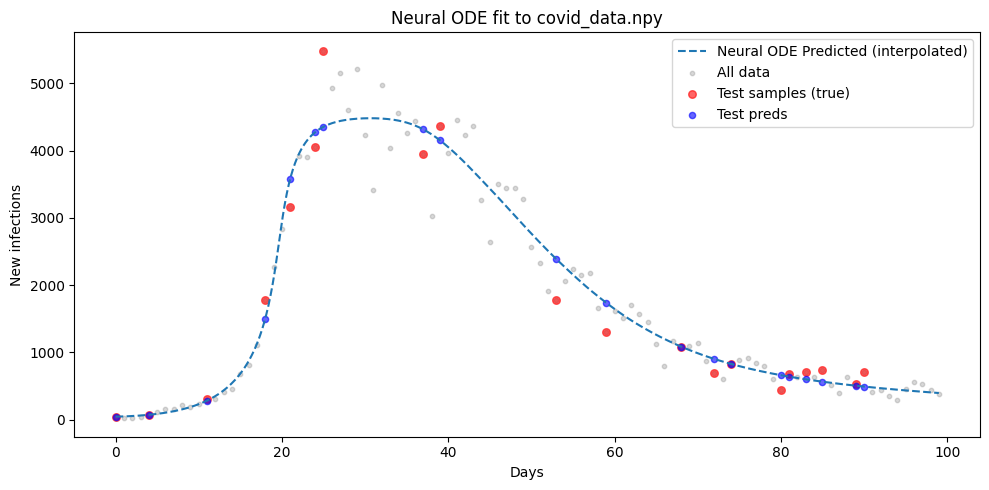

In [ ]:
import jax
import jax.numpy as jnp
import jax.nn as jnn
import jax.tree_util as jtu
import numpy as np
import equinox as eqx
import diffrax
import optax
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# -----------------------------
# Lade dataset covid_data.npy
# -----------------------------
# Erwartet: (N,2) array: col0 = ts (days), col1 = ys (new infections)
data = np.load("covid_data.npy")
assert data.ndim == 2 and data.shape[1] == 2, "covid_data.npy must be Nx2"

ts_all = data[:, 0].reshape(-1, 1).astype(np.float32)
ys_all = data[:, 1].reshape(-1, 1).astype(np.float32)

# Shuffle / split
rng = np.random.RandomState(0)
perm = rng.permutation(ts_all.shape[0])
ts_all = ts_all[perm]
ys_all = ys_all[perm]

# Train/test split
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    ts_all, ys_all, test_size=0.2, random_state=1
)

# Skalierung: scale time (input) und infections (target) separat
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_s = scaler_X.fit_transform(X_train_np)
X_test_s  = scaler_X.transform(X_test_np)

y_train_s = scaler_y.fit_transform(y_train_np)
y_test_s  = scaler_y.transform(y_test_np)

# Convert to jax arrays
X_train = jnp.array(X_train_s, dtype=jnp.float32)
X_test  = jnp.array(X_test_s, dtype=jnp.float32)
y_train = jnp.array(y_train_s, dtype=jnp.float32)
y_test  = jnp.array(y_test_s, dtype=jnp.float32)

# -----------------------------
# Func (wie in deinem Beispiel)
# -----------------------------
class Func(eqx.Module):
    out_scale: jax.Array
    mlp: eqx.nn.MLP

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        # wir nehmen y (state dim=data_size) plus ein Time-Feature => in_size = data_size + 1
        self.out_scale = jnp.array(1.0)
        self.mlp = eqx.nn.MLP(
            in_size=data_size + 1,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.softplus,
            final_activation=jax.nn.tanh,
            key=key,
        )

    # args wird das Time-Feature für das aktuelle Sample sein (skaliert)
    def __call__(self, t, y, args):
        # args ist hier das time-feature (z.B. scalar oder shape (d,))
        # wir machen Input = [y, time_feature]
        time_feat = args
        # ensure shapes align: y shape (..., data_size), time_feat shape (..., 1)
        if time_feat.ndim == 0:
            time_feat = jnp.expand_dims(time_feat, -1)
        inp = jnp.concatenate([y, time_feat], axis=-1)
        return self.out_scale * self.mlp(inp)
# -----------------------------
# NeuralODE wrapper (nutzt Func)
# -----------------------------
class NeuralODE(eqx.Module):
    func: Func

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.func = Func(data_size, width_size, depth, key=key)

    def __call__(self, ts, y0):
        solution = diffrax.diffeqsolve(
            diffrax.ODETerm(self.func),
            diffrax.Tsit5(),
            t0=ts[0],
            t1=ts[-1],
            dt0=ts[1] - ts[0],
            y0=y0,
            stepsize_controller=diffrax.PIDController(rtol=1e-3, atol=1e-6),
            saveat=diffrax.SaveAt(ts=ts),
        )
        return solution.ys

# -----------------------------
# Setup: Modell, Solver, Adjoint
# -----------------------------
key = jax.random.PRNGKey(0)
in_dim = 1
width = 64
depth = 3

model = NeuralODE(data_size=in_dim, width_size=width, depth=depth, key=key)
func_model = model.func

solver = diffrax.Tsit5()
adjoint = diffrax.BacksolveAdjoint()
t0, t1 = 0.0, 1.0
controller = diffrax.PIDController(rtol=1e-2, atol=1e-4)
saveat = diffrax.SaveAt(t1=True)

# -----------------------------
# solve_batch: Batches, model via args
# -----------------------------
def solve_batch(func_model, x_batch):
    # x_batch: (B, d)  -- d==1 in deinem Fall (skaliertes time-feature)
    B, d = x_batch.shape
    # Wir wählen y0 als z.B. zeros (oder x_batch wenn du es vorher so hattest).
    # Hier verwenden wir y0 = 0, und übergeben das time-feature separat an args.
    y0 = jnp.zeros((B * d,), dtype=x_batch.dtype)

    def rhs_flat(t, y_flat, args):
        # args ist hier das tuple (func_model, time_features)
        theta, time_feats = args
        # reshape flattened state in Batch-Form
        y = y_flat.reshape((B, d))
        # time_feats shape (B, d) — wir wollen pro-sample das zugehörige time-feature
        # vmap über Batch, wobei für jede Probe das jeweilige time_feat übergeben wird
        def single_rhs(yi, ti):
            # theta.__call__ erwartet (t, y, args=time_feat_for_sample)
            return theta(t, yi, ti)

        dy = jax.vmap(single_rhs)(y, time_feats)  # shape (B, d)
        return dy.ravel()

    term = diffrax.ODETerm(rhs_flat)
    # pack args: (func_model, x_batch)
    args = (func_model, x_batch)
    sol = diffrax.diffeqsolve(
        term,
        solver,
        t0,
        t1,
        dt0=(t1 - t0) / 1.0,
        y0=y0,
        args=args,
        saveat=saveat,
        stepsize_controller=controller,
        adjoint=adjoint,
        max_steps=20000,
    )
    return sol.ys[0].reshape((B, d))

# -----------------------------
# Loss, Optimizer, Update
# -----------------------------
def loss_fn(model, x, y, l2_reg=1e-6):
    preds = solve_batch(model.func, x)
    mse = jnp.mean((preds - y) ** 2)
    params = eqx.filter(model, eqx.is_array)
    leaves = jtu.tree_leaves(params)
    l2 = l2_reg * sum(jnp.sum(p**2) for p in leaves)
    return mse + l2

optimizer = optax.adam(5e-3)
opt_state = optimizer.init(eqx.filter(model, eqx.is_array))

loss_and_grad = eqx.filter_value_and_grad(loss_fn)

@eqx.filter_jit
def update(model, opt_state, x, y):
    loss, grads = loss_and_grad(model, x, y)
    params_arrays = eqx.filter(model, eqx.is_array)
    updates, opt_state = optimizer.update(grads, opt_state, params=params_arrays)
    model = eqx.apply_updates(model, updates)
    return model, opt_state, loss

# -----------------------------
# Data loader, Training
# -----------------------------
def data_loader_np(X, y, batch_size, shuffle=True):
    n = X.shape[0]
    idx = np.arange(n)
    if shuffle:
        np.random.shuffle(idx)
    for i in range(0, n, batch_size):
        b = idx[i:i+batch_size]
        yield X[b], y[b]

batch_size = 128
epochs = 800

for epoch in range(1, epochs + 1):
    losses = []
    for Xb, yb in data_loader_np(np.array(X_train), np.array(y_train), batch_size):
        Xb_j = jnp.array(Xb, dtype=jnp.float32)
        yb_j = jnp.array(yb, dtype=jnp.float32)
        model, opt_state, loss = update(model, opt_state, Xb_j, yb_j)
        losses.append(float(loss))
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d}  loss={np.mean(losses):.6f}")

# -----------------------------
# Eval & Plot (auf ganzer Zeitachse)
# -----------------------------
# Vorhersage über ein gleichmässiges Gitter über die ursprünglichen Tagen
ts_grid = np.linspace(ts_all.min(), ts_all.max(), 400).reshape(-1, 1).astype(np.float32)
ts_grid_s = scaler_X.transform(ts_grid)
ts_grid_j = jnp.array(ts_grid_s, dtype=jnp.float32)

preds_grid_s = solve_batch(model.func, ts_grid_j)               # scaled preds
preds_grid = scaler_y.inverse_transform(np.array(preds_grid_s)) # zurück in originale Skala

# Für Testpunkte: Vorhersage und Inverse-Transform
preds_test_s = solve_batch(model.func, X_test)
preds_test = scaler_y.inverse_transform(np.array(preds_test_s))

# Plot
plt.figure(figsize=(10, 5))
# echte Kurve (interpoliert für bessere Visualisierung)
plt.plot(ts_grid, preds_grid, label="Neural ODE Predicted (interpolated)", linestyle="--")
plt.scatter(ts_all[:, 0], ys_all[:, 0], s=10, color="gray", alpha=0.3, label="All data")
plt.scatter(X_test_np[:, 0], y_test_np[:, 0], s=30, color="red", alpha=0.6, label="Test samples (true)")
plt.scatter(X_test_np[:, 0], preds_test.ravel(), s=20, color="blue", alpha=0.6, label="Test preds")
plt.legend()
plt.xlabel("Days")
plt.ylabel("New infections")
plt.title("Neural ODE fit to covid_data.npy")
plt.tight_layout()
plt.show()


In [9]:
# Skalierte Vorhersage (Konvertiert von JAX nach NumPy)
np.save("preds_grid_scaled.npy", np.array(preds_grid_s))
# Unskalierte Vorhersage auf dem feinen Gitter (originale Skala)
np.save("preds_grid.npy", preds_grid)



Project 2: Lynx and hares 

Epoch 050  loss=0.998575
Epoch 100  loss=0.985326
Epoch 150  loss=0.837267
Epoch 200  loss=0.715036
Epoch 250  loss=0.698711
Epoch 300  loss=0.536272
Epoch 350  loss=0.371622
Epoch 400  loss=0.345401
Epoch 450  loss=0.343358
Epoch 500  loss=0.327084


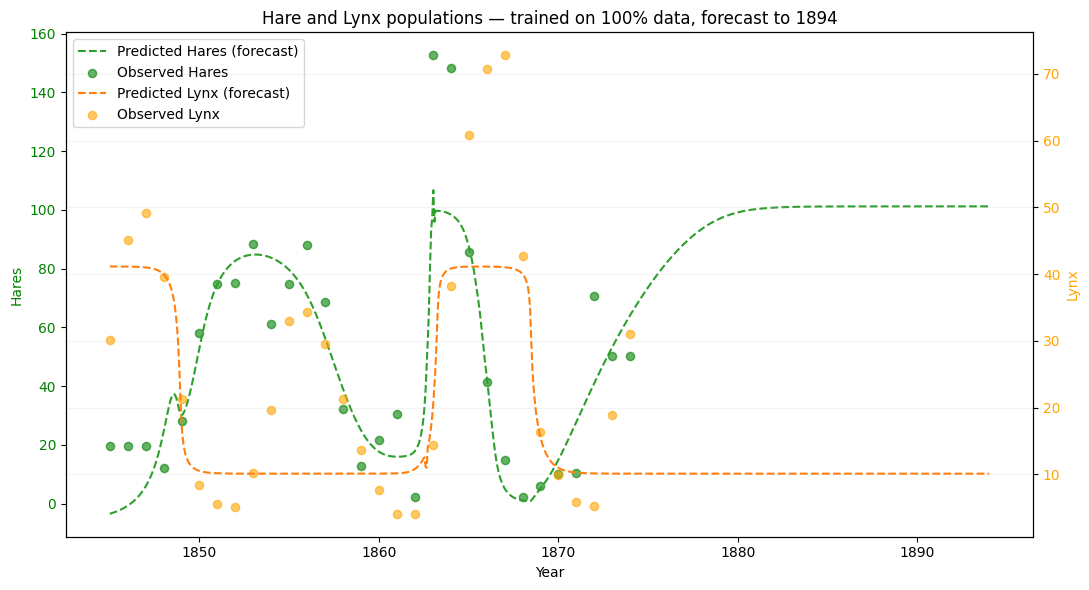

In [ ]:
import jax
import jax.numpy as jnp
import jax.nn as jnn
import jax.tree_util as jtu
import numpy as np
import equinox as eqx
import diffrax
import optax
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Lade dataset LH_data.npy
# -----------------------------
data = np.load("LH_data.npy")
assert data.ndim == 2 and data.shape[1] == 3, "LH_data.npy must be Nx3"

ts_all = data[:, 0].reshape(-1, 1).astype(np.float32)
ys_all = data[:, 1:3].astype(np.float32)  # shape (N,2): [hares, lynx]

# Sortiere nach Zeit
order = np.argsort(ts_all[:, 0])
ts_all = ts_all[order]
ys_all = ys_all[order]

# -----------------------------
# Verwende 100% Daten zum Training
# -----------------------------
X_all_np = ts_all.copy()   # (N,1)
y_all_np = ys_all.copy()   # (N,2)

# Skalierung: time (input) und populations (targets) separat
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_all_s = scaler_X.fit_transform(X_all_np)
y_all_s = scaler_y.fit_transform(y_all_np)

# Convert to jax arrays
X_all = jnp.array(X_all_s, dtype=jnp.float32)
y_all = jnp.array(y_all_s, dtype=jnp.float32)

# -----------------------------
# Func (2D state)
# -----------------------------
class Func(eqx.Module):
    out_scale: jax.Array
    mlp: eqx.nn.MLP

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.out_scale = jnp.ones((data_size,))
        self.mlp = eqx.nn.MLP(
            in_size=data_size + 1,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.softplus,
            final_activation=jax.nn.tanh,
            key=key,
        )

    def __call__(self, t, y, args):
        time_feat = args
        if time_feat.ndim == 0:
            time_feat = jnp.expand_dims(time_feat, -1)
        inp = jnp.concatenate([y, time_feat], axis=-1)
        return self.mlp(inp) * self.out_scale

# -----------------------------
# NeuralODE wrapper
# -----------------------------
class NeuralODE(eqx.Module):
    func: Func

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.func = Func(data_size, width_size, depth, key=key)

# -----------------------------
# Setup: Modell
# -----------------------------
key = jax.random.PRNGKey(0)
data_dim = 2
width = 64
depth = 3

model = NeuralODE(data_size=data_dim, width_size=width, depth=depth, key=key)
func_model = model.func

solver = diffrax.Tsit5()
adjoint = diffrax.BacksolveAdjoint()
controller = diffrax.PIDController(rtol=1e-2, atol=1e-4)

# -----------------------------
# solve_batch: Batch-weise, multi-dim state
# -----------------------------
def solve_batch(func_model, x_batch):
    # x_batch: (B, 1)  -- time features (skaliert)
    B, _ = x_batch.shape
    state_dim = data_dim
    y0 = jnp.zeros((B * state_dim,), dtype=x_batch.dtype)

    def rhs_flat(t, y_flat, args):
        theta, time_feats = args
        y = y_flat.reshape((B, state_dim))
        def single_rhs(yi, ti):
            return theta(t, yi, ti)
        dy = jax.vmap(single_rhs)(y, time_feats)
        return dy.ravel()

    term = diffrax.ODETerm(rhs_flat)
    args = (func_model, x_batch)
    sol = diffrax.diffeqsolve(
        term,
        solver,
        t0=0.0,
        t1=1.0,
        dt0=1e-3,
        y0=y0,
        args=args,
        saveat=diffrax.SaveAt(t1=True),
        stepsize_controller=controller,
        adjoint=adjoint,
        max_steps=20000,
    )
    return sol.ys[0].reshape((B, state_dim))

# -----------------------------
# Loss, Optimizer, Update
# -----------------------------
def loss_fn(model, x, y, l2_reg=1e-6):
    preds = solve_batch(model.func, x)
    mse = jnp.mean((preds - y) ** 2)
    params = eqx.filter(model, eqx.is_array)
    leaves = jtu.tree_leaves(params)
    l2 = l2_reg * sum(jnp.sum(p**2) for p in leaves)
    return mse + l2

optimizer = optax.adam(3e-3)
opt_state = optimizer.init(eqx.filter(model, eqx.is_array))

loss_and_grad = eqx.filter_value_and_grad(loss_fn)

@eqx.filter_jit
def update(model, opt_state, x, y):
    loss, grads = loss_and_grad(model, x, y)
    params_arrays = eqx.filter(model, eqx.is_array)
    updates, opt_state = optimizer.update(grads, opt_state, params=params_arrays)
    model = eqx.apply_updates(model, updates)
    return model, opt_state, loss

# -----------------------------
# Data loader, Training (alle Daten)
# -----------------------------
def data_loader_np(X, y, batch_size, shuffle=True):
    n = X.shape[0]
    idx = np.arange(n)
    if shuffle:
        np.random.shuffle(idx)
    for i in range(0, n, batch_size):
        b = idx[i:i+batch_size]
        yield X[b], y[b]

batch_size = 256
epochs = 500

for epoch in range(1, epochs + 1):
    losses = []
    for Xb, yb in data_loader_np(np.array(X_all), np.array(y_all), batch_size):
        Xb_j = jnp.array(Xb, dtype=jnp.float32)
        yb_j = jnp.array(yb, dtype=jnp.float32)
        model, opt_state, loss = update(model, opt_state, Xb_j, yb_j)
        losses.append(float(loss))
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d}  loss={np.mean(losses):.6f}")

# -----------------------------
# Forecast bis 1894 (20 Jahre nach 1874)
# -----------------------------
year_min = float(ts_all.min())
year_max = float(ts_all.max())  # 1874 expected
forecast_end = 1894.0

ts_grid = np.linspace(year_min, forecast_end, 800).reshape(-1, 1).astype(np.float32)
ts_grid_s = scaler_X.transform(ts_grid)
ts_grid_j = jnp.array(ts_grid_s, dtype=jnp.float32)

preds_grid_s = solve_batch(model.func, ts_grid_j)               # scaled preds shape (M,2)
preds_grid = scaler_y.inverse_transform(np.array(preds_grid_s)) # back to original scale

# -----------------------------
# Plot: beide Populationen in einem Plot mit zwei y-Achsen
# -----------------------------
years_all = ts_all[:, 0]
hares_all = ys_all[:, 0]
lynx_all  = ys_all[:, 1]

fig, ax1 = plt.subplots(figsize=(11, 6))

ax1.plot(ts_grid[:, 0], preds_grid[:, 0], '--', color='tab:green', label='Predicted Hares (forecast)')
ax1.scatter(years_all, hares_all, s=35, color='green', alpha=0.6, label='Observed Hares')
ax1.set_xlabel('Year')
ax1.set_ylabel('Hares', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(ts_grid[:, 0], preds_grid[:, 1], '--', color='tab:orange', label='Predicted Lynx (forecast)')
ax2.scatter(years_all, lynx_all, s=35, color='orange', alpha=0.6, label='Observed Lynx')
ax2.set_ylabel('Lynx', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Hare and Lynx populations — trained on 100% data, forecast to 1894')
plt.grid(alpha=0.15)
fig.tight_layout()
plt.show()


a few more runs follow, where I tuned some parameters with the goal of a dependancy between the two populations

Epoch 050  loss=0.412891
Epoch 100  loss=0.174802
Epoch 150  loss=0.839888
Epoch 200  loss=0.272576
Epoch 250  loss=0.103268
Epoch 300  loss=0.075272
Epoch 350  loss=0.054733
Epoch 400  loss=0.041990
Epoch 450  loss=0.043165
Epoch 500  loss=0.034258
Epoch 550  loss=0.031135
Epoch 600  loss=0.025522
Epoch 650  loss=0.018355
Epoch 700  loss=0.032786
Epoch 750  loss=0.019964
Epoch 800  loss=0.421093


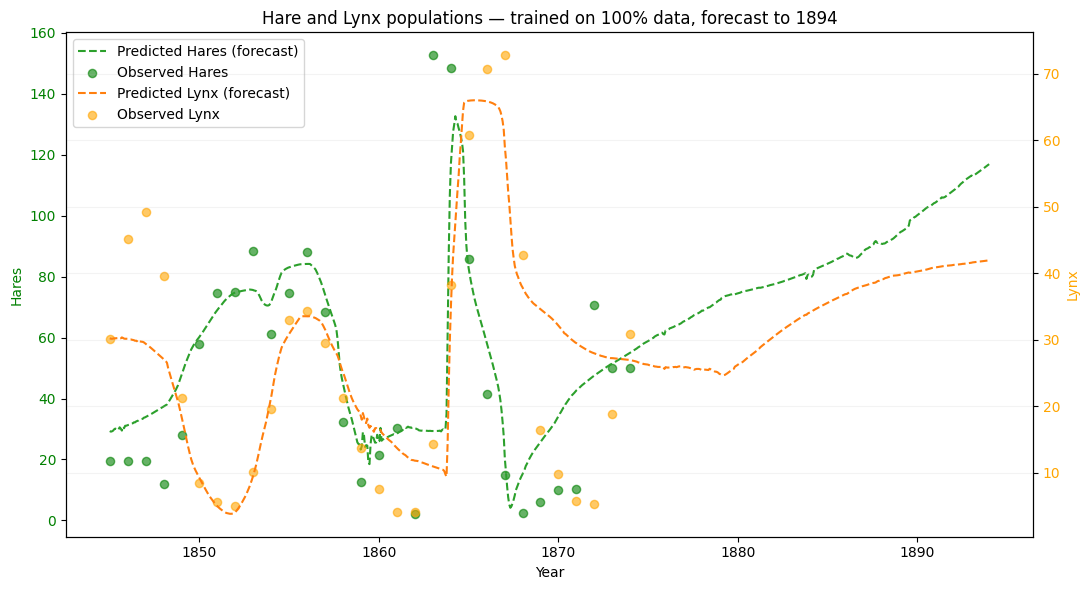

In [27]:
# neural_ode_lh_alltrain.py
import jax
import jax.numpy as jnp
import jax.nn as jnn
import jax.tree_util as jtu
import numpy as np
import equinox as eqx
import diffrax
import optax
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Lade dataset LH_data.npy
# -----------------------------
data = np.load("LH_data.npy")
assert data.ndim == 2 and data.shape[1] == 3, "LH_data.npy must be Nx3"

ts_all = data[:, 0].reshape(-1, 1).astype(np.float32)
ys_all = data[:, 1:3].astype(np.float32)  # shape (N,2): [hares, lynx]

# Sortiere nach Zeit
order = np.argsort(ts_all[:, 0])
ts_all = ts_all[order]
ys_all = ys_all[order]

# -----------------------------
# Verwende 100% Daten zum Training
# -----------------------------
X_all_np = ts_all.copy()   # (N,1)
y_all_np = ys_all.copy()   # (N,2)

# Skalierung: time (input) und populations (targets) separat
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_all_s = scaler_X.fit_transform(X_all_np)
y_all_s = scaler_y.fit_transform(y_all_np)

# Convert to jax arrays
X_all = jnp.array(X_all_s, dtype=jnp.float32)
y_all = jnp.array(y_all_s, dtype=jnp.float32)

# -----------------------------
# Func (2D state)
# -----------------------------
class Func(eqx.Module):
    out_scale: jax.Array
    mlp: eqx.nn.MLP

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.out_scale = jnp.ones((data_size,))
        self.mlp = eqx.nn.MLP(
            in_size=data_size + 1,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.relu,
            final_activation=jax.nn.tanh,
            key=key,
        )

    def __call__(self, t, y, args):
        time_feat = args
        if time_feat.ndim == 0:
            time_feat = jnp.expand_dims(time_feat, -1)
        inp = jnp.concatenate([y, time_feat], axis=-1)
        return self.mlp(inp) * self.out_scale

# -----------------------------
# NeuralODE wrapper
# -----------------------------
class NeuralODE(eqx.Module):
    func: Func

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.func = Func(data_size, width_size, depth, key=key)

# -----------------------------
# Setup: Modell
# -----------------------------
key = jax.random.PRNGKey(0)
data_dim = 2
width = 64
depth = 3
learning_Rate = 5e-3

model = NeuralODE(data_size=data_dim, width_size=width, depth=depth, key=key)
func_model = model.func

solver = diffrax.Tsit5()
adjoint = diffrax.BacksolveAdjoint()
controller = diffrax.PIDController(rtol=1e-2, atol=1e-4)

# -----------------------------
# solve_batch: Batch-weise, multi-dim state
# -----------------------------
def solve_batch(func_model, x_batch):
    # x_batch: (B, 1)  -- time features (skaliert)
    B, _ = x_batch.shape
    state_dim = data_dim
    y0 = jnp.zeros((B * state_dim,), dtype=x_batch.dtype)

    def rhs_flat(t, y_flat, args):
        theta, time_feats = args
        y = y_flat.reshape((B, state_dim))
        def single_rhs(yi, ti):
            return theta(t, yi, ti)
        dy = jax.vmap(single_rhs)(y, time_feats)
        return dy.ravel()

    term = diffrax.ODETerm(rhs_flat)
    args = (func_model, x_batch)
    sol = diffrax.diffeqsolve(
        term,
        solver,
        t0=0.0,
        t1=1.0,
        dt0=1e-3,
        y0=y0,
        args=args,
        saveat=diffrax.SaveAt(t1=True),
        stepsize_controller=controller,
        adjoint=adjoint,
        max_steps=20000,
    )
    return sol.ys[0].reshape((B, state_dim))

# -----------------------------
# Loss, Optimizer, Update
# -----------------------------
def loss_fn(model, x, y, l2_reg=1e-6):
    preds = solve_batch(model.func, x)
    mse = jnp.mean((preds - y) ** 2)
    params = eqx.filter(model, eqx.is_array)
    leaves = jtu.tree_leaves(params)
    l2 = l2_reg * sum(jnp.sum(p**2) for p in leaves)
    return mse + l2

optimizer = optax.adam(learning_Rate)
opt_state = optimizer.init(eqx.filter(model, eqx.is_array))

loss_and_grad = eqx.filter_value_and_grad(loss_fn)

@eqx.filter_jit
def update(model, opt_state, x, y):
    loss, grads = loss_and_grad(model, x, y)
    params_arrays = eqx.filter(model, eqx.is_array)
    updates, opt_state = optimizer.update(grads, opt_state, params=params_arrays)
    model = eqx.apply_updates(model, updates)
    return model, opt_state, loss

# -----------------------------
# Data loader, Training (alle Daten)
# -----------------------------
def data_loader_np(X, y, batch_size, shuffle=True):
    n = X.shape[0]
    idx = np.arange(n)
    if shuffle:
        np.random.shuffle(idx)
    for i in range(0, n, batch_size):
        b = idx[i:i+batch_size]
        yield X[b], y[b]

batch_size = 128
epochs = 800

for epoch in range(1, epochs + 1):
    losses = []
    for Xb, yb in data_loader_np(np.array(X_all), np.array(y_all), batch_size):
        Xb_j = jnp.array(Xb, dtype=jnp.float32)
        yb_j = jnp.array(yb, dtype=jnp.float32)
        model, opt_state, loss = update(model, opt_state, Xb_j, yb_j)
        losses.append(float(loss))
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d}  loss={np.mean(losses):.6f}")

# -----------------------------
# Forecast bis 1894 (20 Jahre nach 1874)
# -----------------------------
year_min = float(ts_all.min())
year_max = float(ts_all.max())  # 1874 expected
forecast_end = 1894.0

ts_grid = np.linspace(year_min, forecast_end, 800).reshape(-1, 1).astype(np.float32)
ts_grid_s = scaler_X.transform(ts_grid)
ts_grid_j = jnp.array(ts_grid_s, dtype=jnp.float32)

preds_grid_s = solve_batch(model.func, ts_grid_j)               # scaled preds shape (M,2)
preds_grid = scaler_y.inverse_transform(np.array(preds_grid_s)) # back to original scale

# -----------------------------
# Plot: beide Populationen in einem Plot mit zwei y-Achsen
# -----------------------------
years_all = ts_all[:, 0]
hares_all = ys_all[:, 0]
lynx_all  = ys_all[:, 1]

fig, ax1 = plt.subplots(figsize=(11, 6))

ax1.plot(ts_grid[:, 0], preds_grid[:, 0], '--', color='tab:green', label='Predicted Hares (forecast)')
ax1.scatter(years_all, hares_all, s=35, color='green', alpha=0.6, label='Observed Hares')
ax1.set_xlabel('Year')
ax1.set_ylabel('Hares', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(ts_grid[:, 0], preds_grid[:, 1], '--', color='tab:orange', label='Predicted Lynx (forecast)')
ax2.scatter(years_all, lynx_all, s=35, color='orange', alpha=0.6, label='Observed Lynx')
ax2.set_ylabel('Lynx', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Hare and Lynx populations — trained on 100% data, forecast to 1894')
plt.grid(alpha=0.15)
fig.tight_layout()
plt.show()


Epoch 050  loss=0.408882
Epoch 100  loss=0.468788
Epoch 150  loss=0.251421
Epoch 200  loss=0.177633
Epoch 250  loss=0.127489
Epoch 300  loss=0.102218
Epoch 350  loss=0.092164
Epoch 400  loss=0.149961
Epoch 450  loss=0.057588
Epoch 500  loss=0.061047
Epoch 550  loss=0.042776
Epoch 600  loss=0.066265
Epoch 650  loss=0.152878
Epoch 700  loss=0.071368
Epoch 750  loss=0.046764
Epoch 800  loss=0.053434


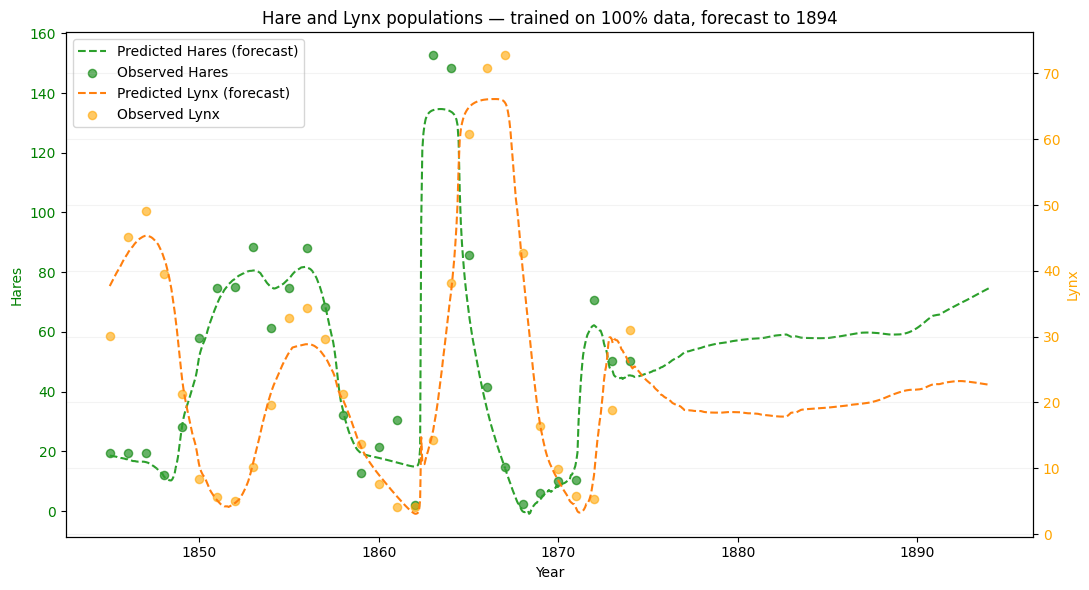

In [41]:
# neural_ode_lh_alltrain.py
import jax
import jax.numpy as jnp
import jax.nn as jnn
import jax.tree_util as jtu
import numpy as np
import equinox as eqx
import diffrax
import optax
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Lade dataset LH_data.npy
# -----------------------------
data = np.load("LH_data.npy")
assert data.ndim == 2 and data.shape[1] == 3, "LH_data.npy must be Nx3"

ts_all = data[:, 0].reshape(-1, 1).astype(np.float32)
ys_all = data[:, 1:3].astype(np.float32)  # shape (N,2): [hares, lynx]

# Sortiere nach Zeit
order = np.argsort(ts_all[:, 0])
ts_all = ts_all[order]
ys_all = ys_all[order]

# -----------------------------
# Verwende 100% Daten zum Training
# -----------------------------
X_all_np = ts_all.copy()   # (N,1)
y_all_np = ys_all.copy()   # (N,2)

# Skalierung: time (input) und populations (targets) separat
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_all_s = scaler_X.fit_transform(X_all_np)
y_all_s = scaler_y.fit_transform(y_all_np)

# Convert to jax arrays
X_all = jnp.array(X_all_s, dtype=jnp.float32)
y_all = jnp.array(y_all_s, dtype=jnp.float32)

# -----------------------------
# Func (2D state)
# -----------------------------
class Func(eqx.Module):
    out_scale: jax.Array
    mlp: eqx.nn.MLP

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.out_scale = jnp.ones((data_size,))
        self.mlp = eqx.nn.MLP(
            in_size=data_size + 1,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.relu,
            final_activation=jax.nn.tanh,
            key=key,
        )

    def __call__(self, t, y, args):
        time_feat = args
        if time_feat.ndim == 0:
            time_feat = jnp.expand_dims(time_feat, -1)
        inp = jnp.concatenate([y, time_feat], axis=-1)
        return self.mlp(inp) * self.out_scale

# -----------------------------
# NeuralODE wrapper
# -----------------------------
class NeuralODE(eqx.Module):
    func: Func

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.func = Func(data_size, width_size, depth, key=key)

# -----------------------------
# Setup: Modell
# -----------------------------
key = jax.random.PRNGKey(0)
data_dim = 2
width = 128
depth = 2
learning_Rate = 5e-3

model = NeuralODE(data_size=data_dim, width_size=width, depth=depth, key=key)
func_model = model.func

solver = diffrax.Tsit5()
adjoint = diffrax.BacksolveAdjoint()
controller = diffrax.PIDController(rtol=1e-2, atol=1e-4)

# -----------------------------
# solve_batch: Batch-weise, multi-dim state
# -----------------------------
def solve_batch(func_model, x_batch):
    # x_batch: (B, 1)  -- time features (skaliert)
    B, _ = x_batch.shape
    state_dim = data_dim
    y0 = jnp.zeros((B * state_dim,), dtype=x_batch.dtype)

    def rhs_flat(t, y_flat, args):
        theta, time_feats = args
        y = y_flat.reshape((B, state_dim))
        def single_rhs(yi, ti):
            return theta(t, yi, ti)
        dy = jax.vmap(single_rhs)(y, time_feats)
        return dy.ravel()

    term = diffrax.ODETerm(rhs_flat)
    args = (func_model, x_batch)
    sol = diffrax.diffeqsolve(
        term,
        solver,
        t0=0.0,
        t1=1.0,
        dt0=1e-3,
        y0=y0,
        args=args,
        saveat=diffrax.SaveAt(t1=True),
        stepsize_controller=controller,
        adjoint=adjoint,
        max_steps=20000,
    )
    return sol.ys[0].reshape((B, state_dim))

# -----------------------------
# Loss, Optimizer, Update
# -----------------------------
def loss_fn(model, x, y, l2_reg=1e-6):
    preds = solve_batch(model.func, x)
    mse = jnp.mean((preds - y) ** 2)
    params = eqx.filter(model, eqx.is_array)
    leaves = jtu.tree_leaves(params)
    l2 = l2_reg * sum(jnp.sum(p**2) for p in leaves)
    return mse + l2

optimizer = optax.adam(learning_Rate)
opt_state = optimizer.init(eqx.filter(model, eqx.is_array))

loss_and_grad = eqx.filter_value_and_grad(loss_fn)

@eqx.filter_jit
def update(model, opt_state, x, y):
    loss, grads = loss_and_grad(model, x, y)
    params_arrays = eqx.filter(model, eqx.is_array)
    updates, opt_state = optimizer.update(grads, opt_state, params=params_arrays)
    model = eqx.apply_updates(model, updates)
    return model, opt_state, loss

# -----------------------------
# Data loader, Training (alle Daten)
# -----------------------------
def data_loader_np(X, y, batch_size, shuffle=True):
    n = X.shape[0]
    idx = np.arange(n)
    if shuffle:
        np.random.shuffle(idx)
    for i in range(0, n, batch_size):
        b = idx[i:i+batch_size]
        yield X[b], y[b]

batch_size = 128
epochs = 800

for epoch in range(1, epochs + 1):
    losses = []
    for Xb, yb in data_loader_np(np.array(X_all), np.array(y_all), batch_size):
        Xb_j = jnp.array(Xb, dtype=jnp.float32)
        yb_j = jnp.array(yb, dtype=jnp.float32)
        model, opt_state, loss = update(model, opt_state, Xb_j, yb_j)
        losses.append(float(loss))
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d}  loss={np.mean(losses):.6f}")

# -----------------------------
# Forecast bis 1894 (20 Jahre nach 1874)
# -----------------------------
year_min = float(ts_all.min())
year_max = float(ts_all.max())  # 1874 expected
forecast_end = 1894.0

ts_grid = np.linspace(year_min, forecast_end, 800).reshape(-1, 1).astype(np.float32)
ts_grid_s = scaler_X.transform(ts_grid)
ts_grid_j = jnp.array(ts_grid_s, dtype=jnp.float32)

preds_grid_s = solve_batch(model.func, ts_grid_j)               # scaled preds shape (M,2)
preds_grid = scaler_y.inverse_transform(np.array(preds_grid_s)) # back to original scale

# -----------------------------
# Plot: beide Populationen in einem Plot mit zwei y-Achsen
# -----------------------------
years_all = ts_all[:, 0]
hares_all = ys_all[:, 0]
lynx_all  = ys_all[:, 1]

fig, ax1 = plt.subplots(figsize=(11, 6))

ax1.plot(ts_grid[:, 0], preds_grid[:, 0], '--', color='tab:green', label='Predicted Hares (forecast)')
ax1.scatter(years_all, hares_all, s=35, color='green', alpha=0.6, label='Observed Hares')
ax1.set_xlabel('Year')
ax1.set_ylabel('Hares', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(ts_grid[:, 0], preds_grid[:, 1], '--', color='tab:orange', label='Predicted Lynx (forecast)')
ax2.scatter(years_all, lynx_all, s=35, color='orange', alpha=0.6, label='Observed Lynx')
ax2.set_ylabel('Lynx', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Hare and Lynx populations — trained on 100% data, forecast to 1894')
plt.grid(alpha=0.15)
fig.tight_layout()
plt.show()


In [36]:
np.save("preds_50x2.npy", preds_grid[np.linspace(0, len(preds_grid)-1, 50, dtype=int)])


Epoch 050  loss=0.413905
Epoch 100  loss=0.244923
Epoch 150  loss=0.141841
Epoch 200  loss=0.124676
Epoch 250  loss=0.099699
Epoch 300  loss=0.069235
Epoch 350  loss=0.088033
Epoch 400  loss=0.040654
Epoch 450  loss=0.030404
Epoch 500  loss=0.029595
Epoch 550  loss=0.036715
Epoch 600  loss=0.027943
Epoch 650  loss=0.132153
Epoch 700  loss=0.036769
Epoch 750  loss=0.050256
Epoch 800  loss=0.234810


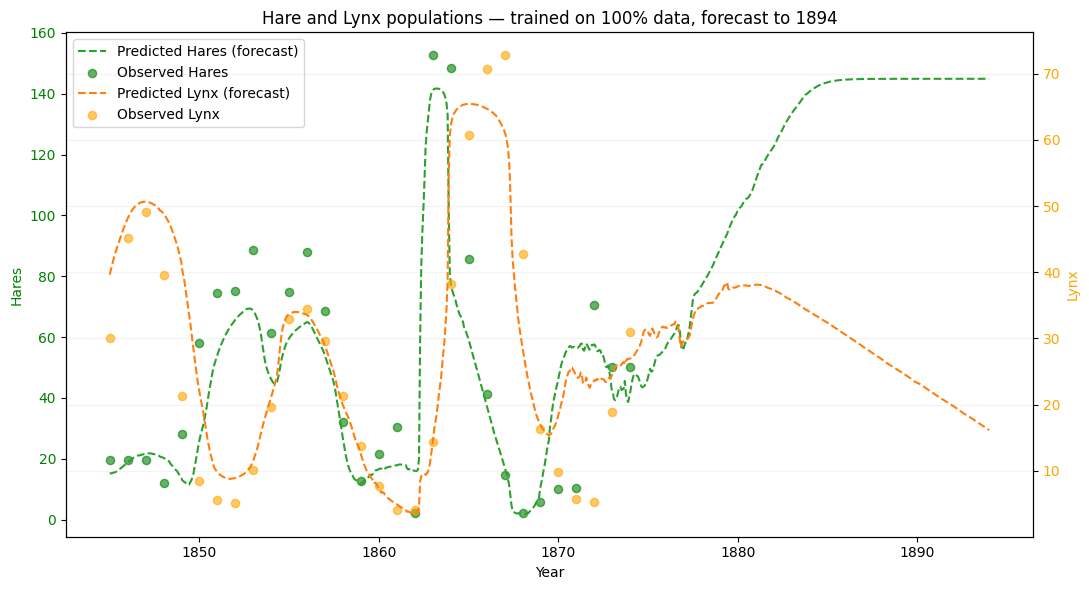

In [53]:
# neural_ode_lh_alltrain.py
import jax
import jax.numpy as jnp
import jax.nn as jnn
import jax.tree_util as jtu
import numpy as np
import equinox as eqx
import diffrax
import optax
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Lade dataset LH_data.npy
# -----------------------------
data = np.load("LH_data.npy")
assert data.ndim == 2 and data.shape[1] == 3, "LH_data.npy must be Nx3"

ts_all = data[:, 0].reshape(-1, 1).astype(np.float32)
ys_all = data[:, 1:3].astype(np.float32)  # shape (N,2): [hares, lynx]

# Sortiere nach Zeit
order = np.argsort(ts_all[:, 0])
ts_all = ts_all[order]
ys_all = ys_all[order]

# -----------------------------
# Verwende 100% Daten zum Training
# -----------------------------
X_all_np = ts_all.copy()   # (N,1)
y_all_np = ys_all.copy()   # (N,2)

# Skalierung: time (input) und populations (targets) separat
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_all_s = scaler_X.fit_transform(X_all_np)
y_all_s = scaler_y.fit_transform(y_all_np)

# Convert to jax arrays
X_all = jnp.array(X_all_s, dtype=jnp.float32)
y_all = jnp.array(y_all_s, dtype=jnp.float32)

# -----------------------------
# Func (2D state)
# -----------------------------
class Func(eqx.Module):
    out_scale: jax.Array
    mlp: eqx.nn.MLP

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.out_scale = jnp.ones((data_size,))
        self.mlp = eqx.nn.MLP(
            in_size=data_size + 1,
            out_size=data_size,
            width_size=width_size,
            depth=depth,
            activation=jnn.relu,
            final_activation=jax.nn.tanh,
            key=key,
        )

    def __call__(self, t, y, args):
        time_feat = args
        if time_feat.ndim == 0:
            time_feat = jnp.expand_dims(time_feat, -1)
        inp = jnp.concatenate([y, time_feat], axis=-1)
        return self.mlp(inp) * self.out_scale

# -----------------------------
# NeuralODE wrapper
# -----------------------------
class NeuralODE(eqx.Module):
    func: Func

    def __init__(self, data_size, width_size, depth, *, key, **kwargs):
        super().__init__(**kwargs)
        self.func = Func(data_size, width_size, depth, key=key)

# -----------------------------
# Setup: Modell
# -----------------------------
key = jax.random.PRNGKey(0)
data_dim = 2
width = 128
depth = 2
learning_Rate = 5e-3

model = NeuralODE(data_size=data_dim, width_size=width, depth=depth, key=key)
func_model = model.func

solver = diffrax.Tsit5()
adjoint = diffrax.BacksolveAdjoint()
controller = diffrax.PIDController(rtol=1e-2, atol=1e-4)

# -----------------------------
# solve_batch: Batch-weise, multi-dim state
# -----------------------------
def solve_batch(func_model, x_batch):
    # x_batch: (B, 1)  -- time features (skaliert)
    B, _ = x_batch.shape
    state_dim = data_dim
    y0 = jnp.zeros((B * state_dim,), dtype=x_batch.dtype)

    def rhs_flat(t, y_flat, args):
        theta, time_feats = args
        y = y_flat.reshape((B, state_dim))
        def single_rhs(yi, ti):
            return theta(t, yi, ti)
        dy = jax.vmap(single_rhs)(y, time_feats)
        return dy.ravel()

    term = diffrax.ODETerm(rhs_flat)
    args = (func_model, x_batch)
    sol = diffrax.diffeqsolve(
        term,
        solver,
        t0=0.0,
        t1=1.0,
        dt0=1e-3,
        y0=y0,
        args=args,
        saveat=diffrax.SaveAt(t1=True),
        stepsize_controller=controller,
        adjoint=adjoint,
        max_steps=20000,
    )
    return sol.ys[0].reshape((B, state_dim))

# -----------------------------
# Loss, Optimizer, Update
# -----------------------------
def loss_fn(model, x, y, l2_reg=1e-6):
    preds = solve_batch(model.func, x)
    mse = jnp.mean((preds - y) ** 2)
    params = eqx.filter(model, eqx.is_array)
    leaves = jtu.tree_leaves(params)
    l2 = l2_reg * sum(jnp.sum(p**2) for p in leaves)
    return mse + l2

optimizer = optax.adam(learning_Rate)
opt_state = optimizer.init(eqx.filter(model, eqx.is_array))

loss_and_grad = eqx.filter_value_and_grad(loss_fn)

@eqx.filter_jit
def update(model, opt_state, x, y):
    loss, grads = loss_and_grad(model, x, y)
    params_arrays = eqx.filter(model, eqx.is_array)
    updates, opt_state = optimizer.update(grads, opt_state, params=params_arrays)
    model = eqx.apply_updates(model, updates)
    return model, opt_state, loss

# -----------------------------
# Data loader, Training (alle Daten)
# -----------------------------
def data_loader_np(X, y, batch_size, shuffle=True):
    n = X.shape[0]
    idx = np.arange(n)
    if shuffle:
        np.random.shuffle(idx)
    for i in range(0, n, batch_size):
        b = idx[i:i+batch_size]
        yield X[b], y[b]

batch_size = 128
epochs = 800

for epoch in range(1, epochs + 1):
    losses = []
    for Xb, yb in data_loader_np(np.array(X_all), np.array(y_all), batch_size):
        Xb_j = jnp.array(Xb, dtype=jnp.float32)
        yb_j = jnp.array(yb, dtype=jnp.float32)
        model, opt_state, loss = update(model, opt_state, Xb_j, yb_j)
        losses.append(float(loss))
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d}  loss={np.mean(losses):.6f}")

# -----------------------------
# Forecast bis 1894 (20 Jahre nach 1874)
# -----------------------------
year_min = float(ts_all.min())
year_max = float(ts_all.max())  # 1874 expected
forecast_end = 1894.0

ts_grid = np.linspace(year_min, forecast_end, 800).reshape(-1, 1).astype(np.float32)
ts_grid_s = scaler_X.transform(ts_grid)
ts_grid_j = jnp.array(ts_grid_s, dtype=jnp.float32)

preds_grid_s = solve_batch(model.func, ts_grid_j)               # scaled preds shape (M,2)
preds_grid = scaler_y.inverse_transform(np.array(preds_grid_s)) # back to original scale

# -----------------------------
# Plot: beide Populationen in einem Plot mit zwei y-Achsen
# -----------------------------
years_all = ts_all[:, 0]
hares_all = ys_all[:, 0]
lynx_all  = ys_all[:, 1]

fig, ax1 = plt.subplots(figsize=(11, 6))

ax1.plot(ts_grid[:, 0], preds_grid[:, 0], '--', color='tab:green', label='Predicted Hares (forecast)')
ax1.scatter(years_all, hares_all, s=35, color='green', alpha=0.6, label='Observed Hares')
ax1.set_xlabel('Year')
ax1.set_ylabel('Hares', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(ts_grid[:, 0], preds_grid[:, 1], '--', color='tab:orange', label='Predicted Lynx (forecast)')
ax2.scatter(years_all, lynx_all, s=35, color='orange', alpha=0.6, label='Observed Lynx')
ax2.set_ylabel('Lynx', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Hare and Lynx populations — trained on 100% data, forecast to 1894')
plt.grid(alpha=0.15)
fig.tight_layout()
plt.show()
